In [74]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("s208 - Sheet1.csv")

In [75]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [76]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,101,60.0,0
1,110,69.0,1
2,180,50.0,2
3,60,152.0,3
4,105,156.0,4


In [77]:
len(main_df)

34055

In [78]:
len(main_df)

34055

In [79]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 133.29514021435912
Average2: 102.60518588124744


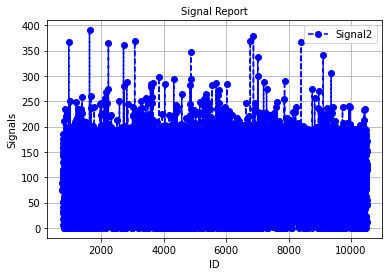

In [80]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [81]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [82]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [83]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,180,50.0
1,60,152.0
2,105,156.0
3,3,179.0
4,35,171.0


In [84]:
len(main_df)

22310

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [85]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [86]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [87]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [88]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[160.76620074023157, 160.68888972953673, 160.72154428764762, 160.88587437681107, 161.11142149000221, 161.14522876388003, 161.11943735679566, 161.33204625238614, 161.32793941495206, 161.40730586206507, 161.32908600445052, 161.71733907607907, 161.52825350883464, 161.83455677578922, 161.64259139923516, 162.0074598293509, 161.83320594700336, 161.996719780775, 162.10175761116164, 162.16056649923945, 162.2109986152261, 162.27821014784837, 162.2207224132264, 162.35210586261857, 162.3508007716955, 162.4324833867685, 162.58080433193746, 162.4672923275118, 162.45741076941164, 162.66149615640012, 162.4587219045809, 162.69254891005923, 162.61953864703892, 162.6710620837704, 162.82500441510902, 162.9958801647227, 162.82246377118906, 163.00276483940843, 163.25868768043867, 163.24014607773364, 163.243243358621

In [89]:
print(rms_values2) 
print(len(rms_values2))  

[12.6793612118368, 12.676312150209016, 12.677600099689515, 12.684079563642412, 12.692967402857466, 12.694299065481324, 12.69328315908834, 12.701655256398126, 12.701493589926818, 12.704617501604094, 12.701538725857215, 12.716813243736777, 12.709376597962413, 12.72142117751744, 12.713873972917742, 12.728215107757682, 12.721368084722782, 12.727793201524568, 12.731918850321096, 12.734228146976143, 12.736208172577351, 12.73884649989348, 12.736589905199367, 12.74174657818223, 12.74169536489142, 12.744900289400796, 12.750717796733541, 12.74626581895701, 12.745878187453842, 12.753881611352684, 12.745929621042983, 12.755098937682108, 12.752236613513682, 12.754256626074701, 12.760290138359277, 12.766983988582531, 12.760190585222036, 12.767253613812503, 12.777272309864836, 12.77654671958482, 12.776667928635446, 12.79329031609034, 12.784831785691088, 12.79558206816019, 12.787416814652618, 12.796238883167515, 12.790899297456242, 12.799062169507774, 12.808122195717027, 12.801872634877048]
50


In [90]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [91]:
df.to_csv("s208_50.csv")